In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 90)

df = pd.read_csv("C:/Users/marcio/Documents/fish_analyzer_final.csv", index_col=0)
import ast
#df['tail_coords'] = df['tail_coords'].apply(ast.literal_eval)
df['center_of_mass'] = df['center_of_mass'].apply(ast.literal_eval)

#df['head'] = df['head'].apply(ast.literal_eval)



In [2]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take
frame_number,,,,,,,,,,,
1276,17.720045,"(680, 478)","(646, 463)","(697, 483)",1,356.0,2,"(440, 426, 408, 444)",3500,NaN,1
1277,18.027756,"(682, 478)","(648, 463)","(699, 484)",1,361.0,2,"(440, 426, 408, 444)",3500,NaN,1
1278,18.027756,"(684, 479)","(648, 463)","(701, 485)",1,361.0,2,"(440, 426, 408, 444)",3500,NaN,1
1279,17.720045,"(686, 480)","(651, 466)","(703, 485)",1,354.0,2,"(440, 426, 408, 444)",3500,NaN,1
1280,17.720045,"(689, 481)","(654, 469)","(706, 486)",1,352.5,2,"(440, 426, 408, 444)",3500,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...
3448,16.278821,"(821, 792)","(796, 765)","(833, 803)",1,327.5,2,"(440, 426, 408, 444)",4995,NaN,1
3449,16.278821,"(822, 793)","(796, 767)","(833, 805)",1,325.0,2,"(440, 426, 408, 444)",4995,NaN,1
3450,14.866069,"(824, 796)","(800, 773)","(834, 807)",1,317.0,2,"(440, 426, 408, 444)",4995,NaN,1


In [3]:
df = df.loc[(df["quadrant"] == 1) & (df["fish_id"] == 1)]
df['tail_coords'] = df['tail_coords'].apply(ast.literal_eval)


<ipython-input-3-93c48c11bfa4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tail_coords'] = df['tail_coords'].apply(ast.literal_eval)


In [4]:
df.tail_coords


frame_number
1312    ((1.0, 1.0022315110563564), (1.028840844611547...
1313    ((1.0, 1.002987894308224), (1.0275602107766406...
1314    ((1.0, 1.0011200891305556), (1.028494416018820...
1315    ((1.0, 1.0029368027999102), (1.026595248863675...
1316    ((1.0, 1.0021448963089865), (1.029120479254747...
                              ...                        
3368    ((1.0, 1.0000966557123512), (1.026857857181970...
3369    ((1.0, 1.00123886953158), (1.02667515022397, 1...
3370    ((1.0, 1.0012510030981332), (1.026850005661508...
3371    ((1.0, 1.0000394066711884), (1.027013448123593...
3372    ((1.0, 0.9986877686917256), (1.027047204389847...
Name: tail_coords, Length: 344, dtype: object

In [5]:
df["tail_uniformity"] = np.NaN

def vari(the_tuple):
    if isinstance(the_tuple, tuple):
        y_tuple = tuple(zip(*the_tuple))[1]
        cv = lambda x: np.std(x, ddof=1) / np.mean(x) * 100        
        result = cv(y_tuple)
        if result is not None:      
            return result
        else:
            return np.NaN
    else:
        np.NaN

df["tail_uniformity"] = df.tail_coords.apply(vari)

<ipython-input-5-ee05c3773ece>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tail_uniformity"] = np.NaN
<ipython-input-5-ee05c3773ece>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["tail_uniformity"] = df.tail_coords.apply(vari)


In [6]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity
frame_number,,,,,,,,,,,,
1312,14.212670,"(700, 712)","(679, 686)","(709, 723)",1,320.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0022315110563564), (1.028840844611547...",1,0.137019
1313,15.620499,"(701, 714)","(681, 688)","(711, 726)",1,326.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.002987894308224), (1.0275602107766406...",1,0.199728
1314,15.000000,"(703, 717)","(682, 691)","(712, 729)",1,325.0,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0011200891305556), (1.028494416018820...",1,0.069743
1315,14.866069,"(704, 720)","(684, 693)","(714, 731)",1,331.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0029368027999102), (1.026595248863675...",1,0.214274
1316,15.000000,"(706, 721)","(685, 695)","(715, 733)",1,318.0,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0021448963089865), (1.029120479254747...",1,0.115484
...,...,...,...,...,...,...,...,...,...,...,...,...
3368,15.033296,"(474, 739)","(506, 743)","(459, 738)",1,313.5,1,"(440, 426, 408, 444)",3425,"((1.0, 1.0000966557123512), (1.026857857181970...",1,0.186795
3369,15.000000,"(469, 738)","(502, 739)","(454, 738)",1,319.0,1,"(440, 426, 408, 444)",3425,"((1.0, 1.00123886953158), (1.02667515022397, 1...",1,0.102402
3370,14.000000,"(464, 738)","(496, 737)","(450, 738)",1,330.0,1,"(440, 426, 408, 444)",3425,"((1.0, 1.0012510030981332), (1.026850005661508...",1,0.266646


In [7]:
df["ant"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-3])
df["pen"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-2])
df["ult"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-1])


<ipython-input-7-6ce8f83db61c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ant"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-3])
<ipython-input-7-6ce8f83db61c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pen"] = df["tail_coords"].apply(lambda x: tuple(zip(*x))[1][-2])
<ipython-input-7-6ce8f83db61c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

In [8]:
df["cycle"] = np.NAN   

sequnces_list = df.sequence.unique()

for n in sequnces_list:
    print(n)
    the_idxs = df.loc[df["sequence"] == n].index
    cycle_number = 1
    for real_index, nominal_index in enumerate(the_idxs):       
        current_position = df.loc[(df.index == nominal_index) & (df["sequence"] == n), "ult"].iloc[0]
        print(current_position)
        print(real_index)       
        if real_index == 0:
            last_position = current_position
                    
        elif real_index == 1:           
            if current_position > last_position:                
                trend = "up"
                
            elif current_position < last_position:
                trend = "down"
                
            else:
                trend = "undefined"
                #  Keep the same last_tail_direction                
                              
        else:
            if (current_position > last_position) & (trend=="undefined"):
                trend = "up"
                print("first")
            elif (current_position < last_position) & (trend=="undefined"):
                trend = "down"
                print("second")
            elif (current_position > last_position) & (trend=="dow"):
                cycle_number=cycle_number+1
            
            elif (current_position < last_position) & (trend=="up"):
                cycle_number=cycle_number+1    
                print("third")           

            elif (current_position == last_position):
                pass
            
           
  
        last_position = current_position
        
        df.loc[(df.index == nominal_index) & (df["sequence"] == n), "cycle"] = cycle_number    
    
    
    
    

<ipython-input-8-285fa5be5059>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cycle"] = np.NAN
c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

2151
0.9987684502069234
0
0.99793076057058
1
0.9991591987337998
2
0.9975444225676604
3
0.9998923416435692
4
1.0020261897408638
5
0.9999150447750464
6
1.0010086552168829
7
2154
1.001140995650382
0
1.005526484438001
1
1.0021748988955252
2
third
1.0021876042840494
3
1.005415207317926
4
1.0080470368662198
5
1.006525454027404
6
third
1.0063008230480257
7
third
1.000765527911657
8
third
1.0017585626580763
9
0.9989878407267131
10
third
1.0008542977952
11
1.0025132722737915
12
0.9960572660204992
13
third
0.9970543264023677
14
1.0010482356305266
15
1.000848641865962
16
third
2159
1.0039525691699607
0
1.0012987012987038
1
0.9921618060104009
2
0.9986907405391836
3
1.0039661654135452
4
1.0066229120891954
5
0.9959450522610922
6
2161
1.002665665477755
0
1.0012952881547
1
0.9999999999999993
2
0.996082207320093
3
1.0013627932892595
4
1.0026507270322884
5
2162
1.003950571054114
0
0.9986779941278741
1
0.9987155575901969
2
0.999981182202915
3
1.0053290949887748
4
1.0051608077785836
5
0.9973231866354588
6

c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a c


18
0.9961361059787173
19
1.000068311800236
20
1.00614955576523
21
0.9999999999999992
22
1.001419870534452
23
1.0000543851173447
24
1.0026008836411364
25
0.9999033742275918
26
0.9974423454765304
27
2668
1.000056087765202
0
1.0011966745736878
1
1.0012774373137825
2
0.9974730646908796
3
third
0.9973733938019649
4
third
0.9999811035525434
5
1.0026420079260223
6
0.9985916854030465
7
third
0.9999810081942337
8
1.0026658363310124
9
1.001238876550028
10
third
0.9999999999999994
11
third
2669
1.0077592229269339
0
1.0075866173196388
1
1.0025390888192813
2
1.006378195836108
3
1.0026185366445564
4
1.0026008836411453
5
1.003803511903648
6
1.0025037557286858
7
1.0013165599636977
8
1.0050399361871705
9
2670
0.9999043457112622
0
0.9987646446578768
1
0.997523040367005
2
0.9987497205152618
3
1.0049912017387526
4
1.0012297704514843
5
0.9949532817701012
6
1.0001128745226922
7
2759
0.9979166666666686
0
1.0021428571428395
1
1.006101190476178
2
1.0020356730952589
3
third
0.991654291654342
4
third
0.99792099

c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a c

In [9]:
df.head(3)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity,ant,pen,ult,cycle
frame_number,,,,,,,,,,,,,,,,
1312,14.212670,"(700, 712)","(679, 686)","(709, 723)",1,320.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0022315110563564), (1.028840844611547...",1,0.137019,0.999535,0.999161,0.998768,1.0
1313,15.620499,"(701, 714)","(681, 688)","(711, 726)",1,326.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.002987894308224), (1.0275602107766406...",1,0.199728,0.999234,0.998575,0.997931,1.0
1314,15.000000,"(703, 717)","(682, 691)","(712, 729)",1,325.0,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0011200891305556), (1.028494416018820...",1,0.069743,0.999998,1.000002,0.999159,1.0


In [10]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity,ant,pen,ult,cycle
frame_number,,,,,,,,,,,,,,,,
1312,14.212670,"(700, 712)","(679, 686)","(709, 723)",1,320.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0022315110563564), (1.028840844611547...",1,0.137019,0.999535,0.999161,0.998768,1.0
1313,15.620499,"(701, 714)","(681, 688)","(711, 726)",1,326.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.002987894308224), (1.0275602107766406...",1,0.199728,0.999234,0.998575,0.997931,1.0
1314,15.000000,"(703, 717)","(682, 691)","(712, 729)",1,325.0,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0011200891305556), (1.028494416018820...",1,0.069743,0.999998,1.000002,0.999159,1.0
1315,14.866069,"(704, 720)","(684, 693)","(714, 731)",1,331.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0029368027999102), (1.026595248863675...",1,0.214274,0.999172,0.998225,0.997544,1.0
1316,15.000000,"(706, 721)","(685, 695)","(715, 733)",1,318.0,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0021448963089865), (1.029120479254747...",1,0.115484,0.999443,0.999271,0.999892,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3368,15.033296,"(474, 739)","(506, 743)","(459, 738)",1,313.5,1,"(440, 426, 408, 444)",3425,"((1.0, 1.0000966557123512), (1.026857857181970...",1,0.186795,1.000580,1.002320,1.004156,1.0
3369,15.000000,"(469, 738)","(502, 739)","(454, 738)",1,319.0,1,"(440, 426, 408, 444)",3425,"((1.0, 1.00123886953158), (1.02667515022397, 1...",1,0.102402,0.999303,0.999110,1.001239,1.0
3370,14.000000,"(464, 738)","(496, 737)","(450, 738)",1,330.0,1,"(440, 426, 408, 444)",3425,"((1.0, 1.0012510030981332), (1.026850005661508...",1,0.266646,0.999420,0.997700,0.994514,1.0


In [11]:
df = df.loc[df["tail_uniformity"] < 0.25]


In [12]:
#pd.set_option('display.max_colwidth', None)
#df.loc[df["sequence"] == 7638]



In [13]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity,ant,pen,ult,cycle
frame_number,,,,,,,,,,,,,,,,
1312,14.212670,"(700, 712)","(679, 686)","(709, 723)",1,320.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0022315110563564), (1.028840844611547...",1,0.137019,0.999535,0.999161,0.998768,1.0
1313,15.620499,"(701, 714)","(681, 688)","(711, 726)",1,326.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.002987894308224), (1.0275602107766406...",1,0.199728,0.999234,0.998575,0.997931,1.0
1314,15.000000,"(703, 717)","(682, 691)","(712, 729)",1,325.0,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0011200891305556), (1.028494416018820...",1,0.069743,0.999998,1.000002,0.999159,1.0
1315,14.866069,"(704, 720)","(684, 693)","(714, 731)",1,331.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0029368027999102), (1.026595248863675...",1,0.214274,0.999172,0.998225,0.997544,1.0
1316,15.000000,"(706, 721)","(685, 695)","(715, 733)",1,318.0,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0021448963089865), (1.029120479254747...",1,0.115484,0.999443,0.999271,0.999892,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3366,14.035669,"(481, 741)","(514, 741)","(467, 740)",1,321.0,1,"(440, 426, 408, 444)",3425,"((1.0, 0.9998457682669262), (1.026787650812909...",1,0.102070,0.999075,0.997918,0.999846,1.0
3368,15.033296,"(474, 739)","(506, 743)","(459, 738)",1,313.5,1,"(440, 426, 408, 444)",3425,"((1.0, 1.0000966557123512), (1.026857857181970...",1,0.186795,1.000580,1.002320,1.004156,1.0
3369,15.000000,"(469, 738)","(502, 739)","(454, 738)",1,319.0,1,"(440, 426, 408, 444)",3425,"((1.0, 1.00123886953158), (1.02667515022397, 1...",1,0.102402,0.999303,0.999110,1.001239,1.0


In [14]:
df[df.index.duplicated()]



,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity,ant,pen,ult,cycle
frame_number,,,,,,,,,,,,,,,,


In [15]:
df['diffs'] = df.groupby(["sequence", "cycle"])['ult'].diff()
df['speed_frame']=df['diffs'].apply(lambda x: abs(x))


<ipython-input-15-c37967204be1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diffs'] = df.groupby(["sequence", "cycle"])['ult'].diff()
<ipython-input-15-c37967204be1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['speed_frame']=df['diffs'].apply(lambda x: abs(x))


In [16]:
#df["velocity"] = np.NaN

temp = df.groupby(["sequence", "cycle"])["speed_frame"].apply(lambda grp: grp.max())
temp = temp.reset_index()

#df["velocity"] = temp["cycle"]


In [17]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity,ant,pen,ult,cycle,diffs,speed_frame
frame_number,,,,,,,,,,,,,,,,,,
1312,14.212670,"(700, 712)","(679, 686)","(709, 723)",1,320.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0022315110563564), (1.028840844611547...",1,0.137019,0.999535,0.999161,0.998768,1.0,NaN,NaN
1313,15.620499,"(701, 714)","(681, 688)","(711, 726)",1,326.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.002987894308224), (1.0275602107766406...",1,0.199728,0.999234,0.998575,0.997931,1.0,-0.000838,0.000838
1314,15.000000,"(703, 717)","(682, 691)","(712, 729)",1,325.0,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0011200891305556), (1.028494416018820...",1,0.069743,0.999998,1.000002,0.999159,1.0,0.001228,0.001228
1315,14.866069,"(704, 720)","(684, 693)","(714, 731)",1,331.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0029368027999102), (1.026595248863675...",1,0.214274,0.999172,0.998225,0.997544,1.0,-0.001615,0.001615
1316,15.000000,"(706, 721)","(685, 695)","(715, 733)",1,318.0,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0021448963089865), (1.029120479254747...",1,0.115484,0.999443,0.999271,0.999892,1.0,0.002348,0.002348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3366,14.035669,"(481, 741)","(514, 741)","(467, 740)",1,321.0,1,"(440, 426, 408, 444)",3425,"((1.0, 0.9998457682669262), (1.026787650812909...",1,0.102070,0.999075,0.997918,0.999846,1.0,NaN,NaN
3368,15.033296,"(474, 739)","(506, 743)","(459, 738)",1,313.5,1,"(440, 426, 408, 444)",3425,"((1.0, 1.0000966557123512), (1.026857857181970...",1,0.186795,1.000580,1.002320,1.004156,1.0,0.004310,0.004310
3369,15.000000,"(469, 738)","(502, 739)","(454, 738)",1,319.0,1,"(440, 426, 408, 444)",3425,"((1.0, 1.00123886953158), (1.02667515022397, 1...",1,0.102402,0.999303,0.999110,1.001239,1.0,-0.002917,0.002917


In [18]:
df = df.reset_index()
temp = temp.rename(columns={"speed_frame":"speed_cycle"})
        
df = df.merge(temp, on=["sequence", "cycle"]) #.set_axis(df.index)
df.head(5)

,frame_number,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle
0,1312,14.212670,"(700, 712)","(679, 686)","(709, 723)",1,320.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0022315110563564), (1.028840844611547...",1,0.137019,0.999535,0.999161,0.998768,1.0,NaN,NaN,0.002348
1,1313,15.620499,"(701, 714)","(681, 688)","(711, 726)",1,326.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.002987894308224), (1.0275602107766406...",1,0.199728,0.999234,0.998575,0.997931,1.0,-0.000838,0.000838,0.002348
2,1314,15.000000,"(703, 717)","(682, 691)","(712, 729)",1,325.0,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0011200891305556), (1.028494416018820...",1,0.069743,0.999998,1.000002,0.999159,1.0,0.001228,0.001228,0.002348
3,1315,14.866069,"(704, 720)","(684, 693)","(714, 731)",1,331.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0029368027999102), (1.026595248863675...",1,0.214274,0.999172,0.998225,0.997544,1.0,-0.001615,0.001615,0.002348
4,1316,15.000000,"(706, 721)","(685, 695)","(715, 733)",1,318.0,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0021448963089865), (1.029120479254747...",1,0.115484,0.999443,0.999271,0.999892,1.0,0.002348,0.002348,0.002348


In [19]:

df = df.set_index('frame_number')


In [20]:
df

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,take,tail_uniformity,ant,pen,ult,cycle,diffs,speed_frame,speed_cycle
frame_number,,,,,,,,,,,,,,,,,,,
1312,14.212670,"(700, 712)","(679, 686)","(709, 723)",1,320.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0022315110563564), (1.028840844611547...",1,0.137019,0.999535,0.999161,0.998768,1.0,NaN,NaN,0.002348
1313,15.620499,"(701, 714)","(681, 688)","(711, 726)",1,326.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.002987894308224), (1.0275602107766406...",1,0.199728,0.999234,0.998575,0.997931,1.0,-0.000838,0.000838,0.002348
1314,15.000000,"(703, 717)","(682, 691)","(712, 729)",1,325.0,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0011200891305556), (1.028494416018820...",1,0.069743,0.999998,1.000002,0.999159,1.0,0.001228,0.001228,0.002348
1315,14.866069,"(704, 720)","(684, 693)","(714, 731)",1,331.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0029368027999102), (1.026595248863675...",1,0.214274,0.999172,0.998225,0.997544,1.0,-0.001615,0.001615,0.002348
1316,15.000000,"(706, 721)","(685, 695)","(715, 733)",1,318.0,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0021448963089865), (1.029120479254747...",1,0.115484,0.999443,0.999271,0.999892,1.0,0.002348,0.002348,0.002348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3366,14.035669,"(481, 741)","(514, 741)","(467, 740)",1,321.0,1,"(440, 426, 408, 444)",3425,"((1.0, 0.9998457682669262), (1.026787650812909...",1,0.102070,0.999075,0.997918,0.999846,1.0,NaN,NaN,0.004310
3368,15.033296,"(474, 739)","(506, 743)","(459, 738)",1,313.5,1,"(440, 426, 408, 444)",3425,"((1.0, 1.0000966557123512), (1.026857857181970...",1,0.186795,1.000580,1.002320,1.004156,1.0,0.004310,0.004310,0.004310
3369,15.000000,"(469, 738)","(502, 739)","(454, 738)",1,319.0,1,"(440, 426, 408, 444)",3425,"((1.0, 1.00123886953158), (1.02667515022397, 1...",1,0.102402,0.999303,0.999110,1.001239,1.0,-0.002917,0.002917,0.004310


In [21]:
#df["distance_cycle"] = np.NaN
import math
temp = df.groupby(["sequence", "cycle"])
#temp = temp.reset_index()
the_firsts = temp.head(1)
print(the_firsts.columns)
the_lasts = temp.tail(1)
the_firsts["distance_cycle"] = np.NaN


for i in range(0, len(the_firsts)):
    #the_idxs = df.loc[df["sequence"] == i].index
    first_com = the_firsts.iloc[i, 1]
    last_com = the_lasts.iloc[i, 1]
    the_firsts.iloc[i, 19] = math.hypot((first_com[0] - last_com[0]), (first_com[1] - last_com[1]))
      
    
    
temp = the_firsts[["sequence", "cycle", "distance_cycle"]]
#temp = temp.rename(columns={"distance":"distance_g"})
df = df.reset_index()

df = df.merge(temp, on=["sequence", "cycle"])

    
df = df.set_index('frame_number')        
    
    



Index(['length_of_fish', 'center_of_mass', 'fish_tail', 'fish_head',
       'quadrant', 'fish_area', 'fish_id', 'quad_coord', 'sequence',
       'tail_coords', 'take', 'tail_uniformity', 'ant', 'pen', 'ult', 'cycle',
       'diffs', 'speed_frame', 'speed_cycle'],
      dtype='object')


<ipython-input-21-a21b79bd7faa>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_firsts["distance_cycle"] = np.NaN
c:\Users\marcio\Miniconda3\envs\medaka_env\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


<AxesSubplot:>

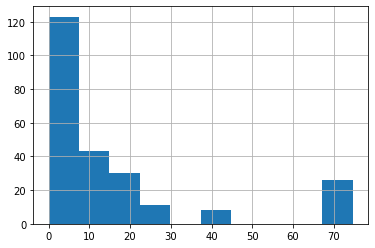

In [22]:
filt = df[["cycle", "fish_id", "quadrant", "sequence", "distance_cycle", "take"]]
filt["distance_cycle"].hist()
#filt[filt["distance_cycle"] > 20]


In [23]:
temp_max = df.groupby(["sequence", "cycle"])["ult"].max()
temp_max = temp_max.reset_index()
temp_max = temp_max.rename(columns={"ult":"ult_max"})
df = df.reset_index()
df = df.merge(temp_max, on=["sequence", "cycle"]).set_axis(df.index)
df = df.set_index('frame_number')        


temp_min = df.groupby(["sequence", "cycle"])["ult"].min()
temp_min = temp_min.reset_index()
temp_min = temp_min.rename(columns={"ult":"ult_min"})
df = df.reset_index()
df = df.merge(temp_min, on=["sequence", "cycle"]).set_axis(df.index)
df = df.set_index('frame_number')
df["ult_min"] = df["ult_min"].apply(lambda x: abs(x))



In [24]:
df["amplitude_cycle"] = abs(df["ult_max"] - df["ult_min"])



In [25]:
df.head(6)

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,...,pen,ult,cycle,diffs,speed_frame,speed_cycle,distance_cycle,ult_max,ult_min,amplitude_cycle
frame_number,,,,,,,,,,,,,,,,,,,,,
1312,14.212670,"(700, 712)","(679, 686)","(709, 723)",1,320.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0022315110563564), (1.028840844611547...",...,0.999161,0.998768,1.0,NaN,NaN,0.002348,15.231546,1.002026,0.997544,0.004482
1313,15.620499,"(701, 714)","(681, 688)","(711, 726)",1,326.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.002987894308224), (1.0275602107766406...",...,0.998575,0.997931,1.0,-0.000838,0.000838,0.002348,15.231546,1.002026,0.997544,0.004482
1314,15.000000,"(703, 717)","(682, 691)","(712, 729)",1,325.0,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0011200891305556), (1.028494416018820...",...,1.000002,0.999159,1.0,0.001228,0.001228,0.002348,15.231546,1.002026,0.997544,0.004482
1315,14.866069,"(704, 720)","(684, 693)","(714, 731)",1,331.5,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0029368027999102), (1.026595248863675...",...,0.998225,0.997544,1.0,-0.001615,0.001615,0.002348,15.231546,1.002026,0.997544,0.004482
1316,15.000000,"(706, 721)","(685, 695)","(715, 733)",1,318.0,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0021448963089865), (1.029120479254747...",...,0.999271,0.999892,1.0,0.002348,0.002348,0.002348,15.231546,1.002026,0.997544,0.004482
1317,14.866069,"(706, 723)","(685, 697)","(716, 734)",1,320.0,1,"(440, 426, 408, 444)",2151,"((1.0, 1.0010005023464172), (1.029022137836724...",...,1.000213,1.002026,1.0,0.002134,0.002134,0.002348,15.231546,1.002026,0.997544,0.004482


In [26]:
#df=df.loc[df["speed_cycle"] < 110]
#df=df.loc[df["distance_cycle"] < 38]
#df=df.loc[df["amplitude_cycle"] < 160]

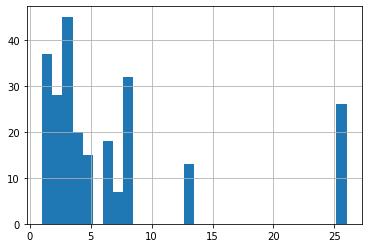

In [27]:
temp = df.groupby(["sequence", "cycle"])["pen"].count()
temp = temp.reset_index()
temp = temp.rename(columns={"pen":"c_counts"})
df = df.reset_index()
df = df.merge(temp, on=["sequence", "cycle"])
df = df.set_index('frame_number')        


df["c_counts"].hist(bins=30)

df = df.loc[(df["c_counts"] > 1) & (df["c_counts"] < 10)]

<AxesSubplot:>

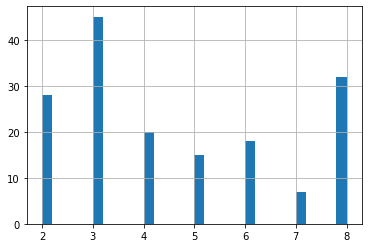

In [28]:
df["c_counts"].hist(bins=30)


In [29]:
#pd.set_option('display.max_columns', None)
#df[df["c_counts"] > 10].head(15)


<AxesSubplot:>

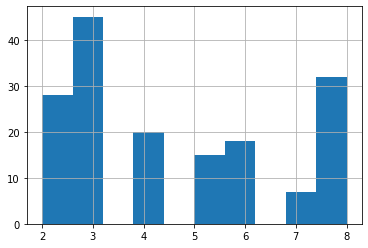

In [30]:
df["c_counts"].hist(bins=10)


In [31]:
df["fish_speed"] = df["distance_cycle"]/df["c_counts"]


In [32]:
df["fish_uid"] = df.apply(lambda x: str(x.quadrant) + str(x.fish_id), axis = 1 )

In [33]:
#df["freq_veloc_esp"] = df["amplitude_cycle"]/df["fish_speed"]
#df["amp_veloc_esp"] = df["freq"]/df["fish_speed"]

In [34]:
graphs = df.groupby(["sequence", "cycle"])
to_graphs = graphs.tail(1)


<AxesSubplot:>

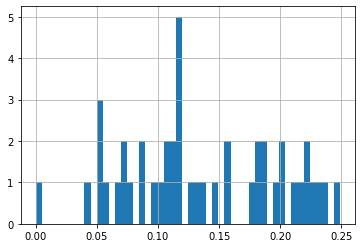

In [35]:
to_graphs.tail_uniformity.hist(bins=50)

In [36]:
only1 = to_graphs

<AxesSubplot:>

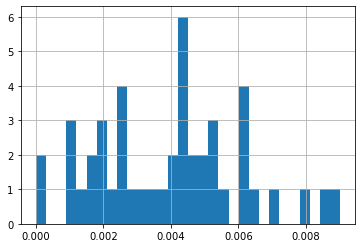

In [37]:
to_graphs["speed_cycle"].hist(bins=30)

In [38]:
#to_graphs = to_graphs.loc[to_graphs["speed_cycle"] > 0.005]

Decimal Representation p: 0.000659191304289432895673062074
Decimal Representation r: 0.488680968817759631139807652289


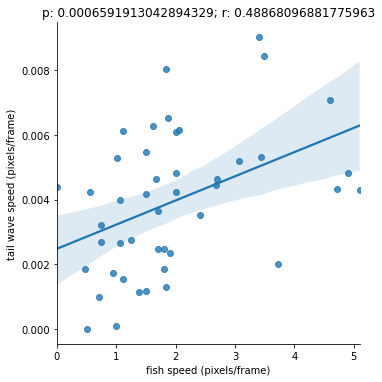

In [39]:
#to_graphs=to_graphs.loc[to_graphs["speed_cycle"] < 140]

#from scipy.stats import spearmanr
from scipy.stats.mstats import spearmanr


ax = sns.lmplot(data=only1, x="fish_speed", y="speed_cycle") #.set(title='p: 0.00000050; r: 0.35')
r, pvalue = spearmanr(only1["fish_speed"], only1["speed_cycle"])
ax.set(xlabel='fish speed (pixels/frame)', ylabel='tail wave speed (pixels/frame)').set(title='p: ' + str(pvalue) + "; r: " + str(r))

print(f"Decimal Representation p: {pvalue:.30f}")
print(f"Decimal Representation r: {r:.30f}")

<AxesSubplot:>

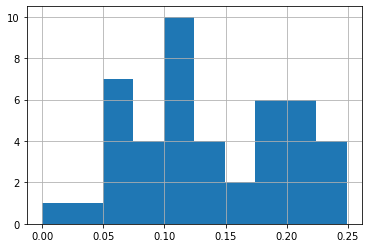

In [40]:

only1["tail_uniformity"].hist()



In [41]:
'''from scipy.stats.mstats import spearmanr

ax = sns.lmplot(data=only1, x="freq", y="fish_speed")
r, pvalue = spearmanr(to_graphs["freq"], to_graphs["fish_speed"])
ax.set(xlabel='freq', ylabel='amplitude_cycle').set(title='p: ' + str(pvalue) + "; r: " + str(r))

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")'''

'from scipy.stats.mstats import spearmanr\n\nax = sns.lmplot(data=only1, x="freq", y="fish_speed")\nr, pvalue = spearmanr(to_graphs["freq"], to_graphs["fish_speed"])\nax.set(xlabel=\'freq\', ylabel=\'amplitude_cycle\').set(title=\'p: \' + str(pvalue) + "; r: " + str(r))\n\nprint(pvalue)\nprint(f"Decimal Representation of p: {pvalue:.30f}")\nprint(f"Decimal Representation of r: {r:.30f}")'

0.0001005598192959388
Decimal Representation of p: 0.000100559819295938801400960849
Decimal Representation of r: 0.547138152815244804827443658723


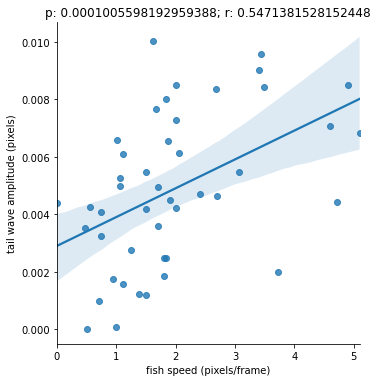

In [42]:
from scipy.stats.mstats import spearmanr

ax = sns.lmplot(data=only1, x="fish_speed", y="amplitude_cycle")
r, pvalue = spearmanr(only1["fish_speed"], only1["amplitude_cycle"])
ax.set(xlabel='fish speed (pixels/frame)', ylabel='tail wave amplitude (pixels)').set(title='p: ' + str(pvalue) + "; r: " + str(r))

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

In [43]:
#df=df.loc[df["amp/freq"] < 1]


from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(only1["fish_speed"], only1["freq*ampli"])

ax = sns.lmplot(data=only1, x="fish_speed", y="freq*ampli").set(title='p: ' + str(pvalue) + "; r: " + str(r))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='freq*ampli')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

KeyError: 'freq*ampli'

In [ ]:

from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(only1["fish_speed"], only1["freq"])
ax = sns.lmplot(data=only1, x="fish_speed", y="freq").set(title='p: ' + str(pvalue) + "; r: " + str(r))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='fish freq')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

KeyError: 'freq'

In [ ]:
from scipy.stats.mstats import spearmanr

r, pvalue = spearmanr(only1["fish_speed"], only1["freq*ampli"])

ax = sns.lmplot(data=only1, x="fish_speed", y="freq*ampli").set(title='p: ' + str(pvalue) + "; r: " + str(r))
ax.set(xlabel='fish speed (pixels/frame)', ylabel='amplitude (pixels) * frequency (waves per frame)')

print(pvalue)
print(f"Decimal Representation of p: {pvalue:.30f}")
print(f"Decimal Representation of r: {r:.30f}")

KeyError: 'freq*ampli'

In [ ]:

ax = sns.boxplot(data=df, x="fish_uid", y="amp_veloc_esp", showfliers = False)
ax.set(xlabel='', ylabel='')


ValueError: Could not interpret input 'amp_veloc_esp'

In [ ]:
df.loc[df["amp_veloc_esp"] > 41] #.sort_values(ascending=False).to_list()

,length_of_fish,center_of_mass,fish_tail,fish_head,quadrant,fish_area,fish_id,quad_coord,sequence,tail_coords,...,amplitude_cycle,freq,wave_length,freq*ampli,c_counts,tail_uniformity,fish_speed,fish_uid,freq_veloc_esp,amp_veloc_esp
frame_number,,,,,,,,,,,,,,,,,,,,,
1292,21.840330,"(137, 664)","(183, 653)","(116, 670)",0,614.0,1,"(0, 430, 414, 440)",5,"((1.0, 0.9867924506969585), (1.3592182751838364, 0.9977486065288605), (1.8420385375276993, 1.0027693392554293), (2.355759296661575, 1.006579739656512), (2.8347169969066917, 1.0195141452874354))",...,0.004019,2.500000e-01,0.008039,1.004865e-03,3,1.349995,0.000000,01,inf,inf
1293,21.840330,"(137, 664)","(183, 653)","(116, 670)",0,611.0,1,"(0, 430, 414, 440)",5,"((1.0, 0.9867924506969585), (1.3592182751838364, 0.9977486065288605), (1.8420385375276993, 1.0027693392554293), (2.355759296661575, 1.006579739656512), (2.8347169969066917, 1.0195141452874354))",...,0.004019,2.500000e-01,0.008039,1.004865e-03,3,1.349995,0.000000,01,inf,inf
1294,21.189620,"(137, 664)","(183, 653)","(117, 671)",0,621.5,1,"(0, 430, 414, 440)",5,"((1.0, 0.988406702387433), (1.1456815629720571, 0.9941952744890208), (1.8546651694360592, 1.0040591932758085), (2.3635794294184347, 1.0077711870908082), (2.8472422184856585, 1.02353360503306))",...,0.004019,2.500000e-01,0.008039,1.004865e-03,3,1.349995,0.000000,01,inf,inf
1309,21.840330,"(139, 664)","(185, 653)","(118, 670)",0,618.5,1,"(0, 430, 414, 440)",8,"((1.0, 1.0026293186262893), (1.29400222234897, 1.0002178782616007), (1.814991454599721, 0.9997608784537363), (2.3273335626637386, 1.0016054187577832), (2.839675670727753, 1.00287902984135))",...,0.000064,5.000000e-01,0.000129,3.212549e-05,2,0.139653,0.000000,01,inf,inf
1310,21.840330,"(139, 664)","(185, 654)","(118, 670)",0,617.5,1,"(0, 430, 414, 440)",8,"((1.0, 1.000040897379596), (1.4647042239045405, 0.9998353685101642), (1.929408447809083, 1.0002509199435972), (2.3853446674890106, 1.0012803204424492), (2.8412808871689434, 1.0029432808175915))",...,0.000064,5.000000e-01,0.000129,3.212549e-05,2,0.139653,0.000000,01,inf,inf
1313,21.840330,"(139, 664)","(185, 654)","(118, 670)",0,617.5,1,"(0, 430, 414, 440)",8,"((1.0, 1.001264813154582), (1.39067780260122, 0.9999301034502314), (1.8778760034921615, 1.0000948186058958), (2.355881785498366, 1.0013882866584154), (2.8338875675045694, 1.0029158472509627))",...,0.000000,inf,0.000000,NaN,2,0.120124,0.000000,01,NaN,inf
1314,21.840330,"(139, 664)","(185, 654)","(118, 670)",0,617.5,1,"(0, 430, 414, 440)",8,"((1.0, 1.001264813154582), (1.39067780260122, 0.9999301034502314), (1.8778760034921615, 1.0000948186058958), (2.355881785498366, 1.0013882866584154), (2.8338875675045694, 1.0029158472509627))",...,0.000000,inf,0.000000,NaN,2,0.120124,0.000000,01,NaN,inf
1316,20.880613,"(138, 664)","(184, 655)","(118, 670)",0,615.5,1,"(0, 430, 414, 440)",8,"((1.0, 1.0028285755525668), (1.4700254079782067, 1.0004984945750435), (1.926685164544715, 0.9992469435427895), (2.390027746817071, 0.999030977616134), (2.8400046776777303, 0.9998698238176553))",...,0.000000,inf,0.000000,NaN,4,0.152740,0.000000,01,NaN,inf
1317,20.880613,"(138, 664)","(184, 655)","(118, 670)",0,615.5,1,"(0, 430, 414, 440)",8,"((1.0, 1.0028285755525668), (1.4700254079782067, 1.0004984945750435), (1.926685164544715, 0.9992469435427895), (2.390027746817071, 0.999030977616134), (2.8400046776777303, 0.9998698238176553))",...,0.000000,inf,0.000000,NaN,4,0.152740,0.000000,01,NaN,inf


[Text(0.5, 0, ''), Text(0, 0.5, '')]

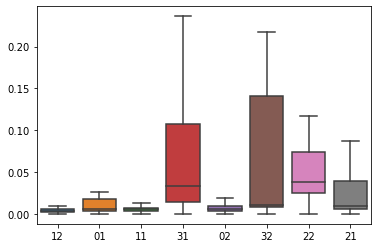

In [ ]:
ax = sns.boxplot(data=df, x="fish_uid", y="freq_veloc_esp",showfliers = False)
ax.set(xlabel='', ylabel='')
